# <center>+++ Project still in progres +++<center>

# Sentiment Analysis on Twitter Data

## 1. Data Cleaning

In [36]:
!pip install --ignore-installed --upgrade tensorflow==1.6.0
!pip install keras==2.1.5

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 45.9MB 11kB/s eta 0:00:011  3% |█▏                              | 1.6MB 10.7MB/s eta 0:00:05    22% |███████▎                        | 10.5MB 5.3MB/s eta 0:00:07    27% |█████████                       | 12.8MB 7.4MB/s eta 0:00:05    28% |█████████▏                      | 13.2MB 4.9MB/s eta 0:00:07    31% |██████████                      | 14.4MB 6.6MB/s eta 0:00:05    55% |█████████████████▋              | 25.3MB 5.3MB/s eta 0:00:04    57% |█████████████████

    100% |████████████████████████████████| 337kB 1.3MB/s ta 0:00:01
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from wordcloud import WordCloud
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ucsddse230/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [4]:
%%time
columns = ['target', 'id', 'date', 'query_string', 'user', 'text']
df = pd.read_csv('trainingdata.csv', header=None, names=columns, encoding='latin1')

CPU times: user 5 s, sys: 502 ms, total: 5.5 s
Wall time: 8.6 s


In [5]:
df.head()

,target,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.groupby(['target']).count()

,id,date,query_string,user,text
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


In [7]:
decode_map = {0: 'negative', 2: 'neutral', 4: 'positive'}
def decode_sentiment(label):
    return decode_map[int(label)]

In [8]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 1.42 s, sys: 12.7 ms, total: 1.43 s
Wall time: 1.43 s


Text(0.5,1,'Dataset labels distribution')

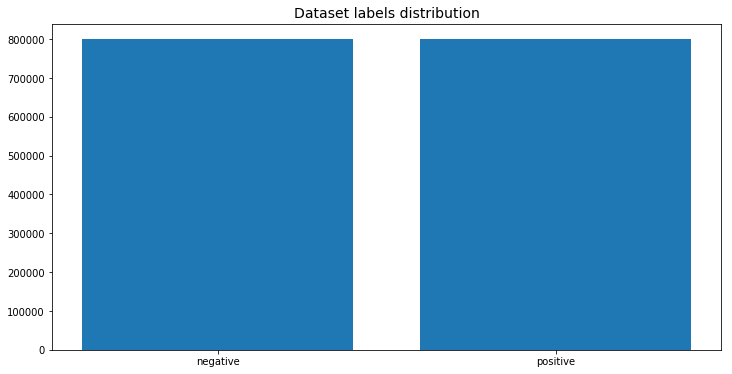

In [9]:
target_cnt = Counter(df.target)

plt.figure(figsize=(12,6))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title('Dataset labels distribution', fontsize=14)

In [8]:
%%time
cvec = CountVectorizer()
cvec.fit(df.text)

CPU times: user 42.8 s, sys: 849 ms, total: 43.6 s
Wall time: 43.6 s


In [9]:
print(cvec.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
%%time

#Create matrices with word counts for neg and pos texts
neg_doc_matrix = cvec.transform(df[df.target == 'negative'].text)
pos_doc_matrix = cvec.transform(df[df.target == 'positive'].text)

#Create 2 lists with counts for each word in all neg and pos texts
neg_tf = np.sum(neg_doc_matrix, axis=0)
pos_tf = np.sum(pos_doc_matrix, axis=0)

#Convert neg and pos word count lists from from dim (1, 684358) to dim (684358,)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

#Combine two arrays from neg and pos word counts to dataframe and add words as headers
term_freq_df = pd.DataFrame([neg,pos], columns=cvec.get_feature_names()).transpose()
print(term_freq_df.shape)
print(term_freq_df.iloc[89700:89720,:])

term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

term_freq_df.sort_values(by='total', ascending=False).iloc[0:10]

(684358, 2)
                    0    1
backstagejbj        2    3
backstagepazz       0    1
backstard           0    1
backstop            0    1
backstory           5   15
backstothewall      2    0
backstreeets        0    1
backstreet         20   48
backstreet_team     3    6
backstreetbb21      0    1
backstreetboy       0    1
backstreetboys    131  139
backstreetlover     0    1
backstreetpride     0    1
backstreets         1    1
backstreetsmac      0    1
backstret           1    0
backstroke          3    0
backstrom           1    0
backststreetboys    1    0
CPU times: user 1min 53s, sys: 1.36 s, total: 1min 55s
Wall time: 1min 57s


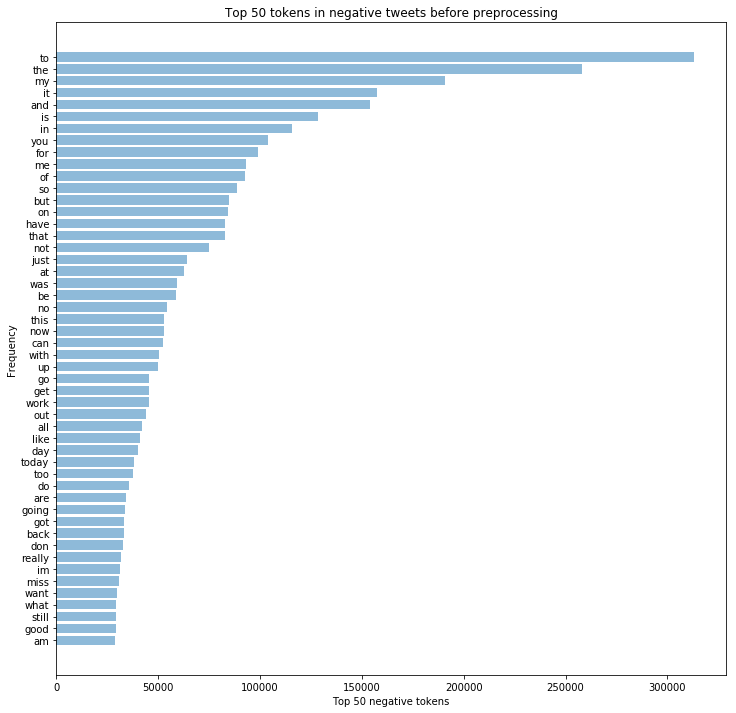

In [11]:
y_pos = np.arange(50)
plt.figure(figsize=(12,12))
plt.barh(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.yticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index, rotation='horizontal')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets before preprocessing')
plt.gca().invert_yaxis()

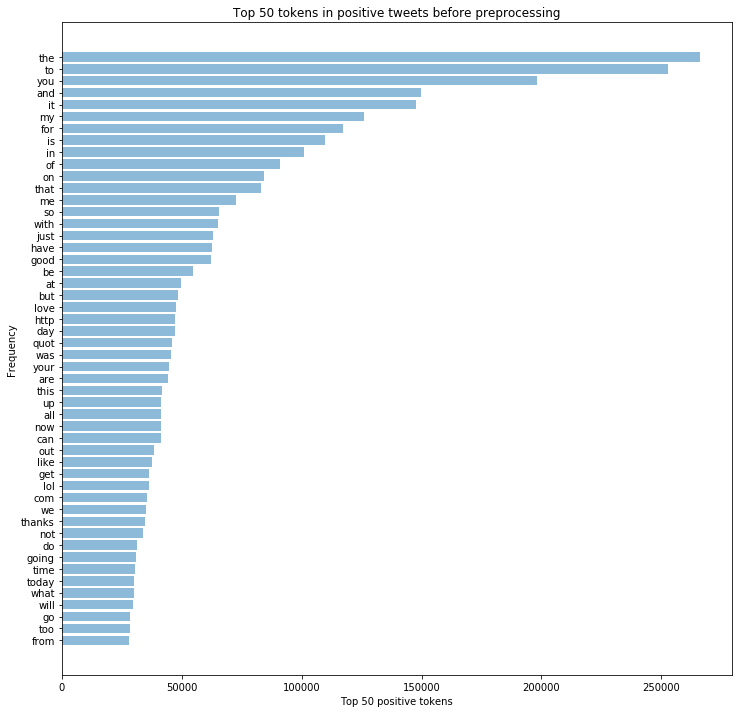

In [12]:
y_pos = np.arange(50)
plt.figure(figsize=(12,12))
plt.barh(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.yticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index, rotation='horizontal')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets before preprocessing')
plt.gca().invert_yaxis()

In [13]:
corpus = ['This is the first document.','This document is the second document.','And this is the third one.', 'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [10]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [11]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return ' '.join(tokens)

In [12]:
df.text = df.text.apply(lambda x: preprocess(x))

In [13]:
%%time
df_prep = df
cvec_prep = CountVectorizer()
cvec_prep.fit(df_prep.text)

CPU times: user 26.6 s, sys: 513 ms, total: 27.2 s
Wall time: 27.2 s


In [18]:
%%time

#Create matrices with word counts for neg and pos texts
neg_doc_matrix_prep = cvec_prep.transform(df_prep[df_prep.target == 'negative'].text)
pos_doc_matrix_prep = cvec_prep.transform(df_prep[df_prep.target == 'positive'].text)

#Create 2 lists with counts for each word in all neg and pos texts
neg_tf_prep = np.sum(neg_doc_matrix_prep, axis=0)
pos_tf_prep = np.sum(pos_doc_matrix_prep, axis=0)

#Convert neg and pos word count lists from from dim (1, 684358) to dim (684358,)
neg_prep = np.squeeze(np.asarray(neg_tf_prep))
pos_prep = np.squeeze(np.asarray(pos_tf_prep))

#Combine two arrays from neg and pos word counts to dataframe and add words as headers
term_freq_df_prep = pd.DataFrame([neg_prep,pos_prep], columns=cvec_prep.get_feature_names()).transpose()
print(term_freq_df_prep.shape)
print(term_freq_df_prep.iloc[89700:89720,:])

term_freq_df_prep.columns = ['negative', 'positive']
term_freq_df_prep['total'] = term_freq_df_prep['negative'] + term_freq_df_prep['positive']

term_freq_df_prep.sort_values(by='total', ascending=False).iloc[0:10]

(335479, 2)
                       0   1
dumbestsongever        0   1
dumbf                  0   1
dumbface               1   0
dumbfound              0   1
dumbfounded            4   3
dumbfoundedness        0   1
dumbfriendthatzme      1   0
dumbfuck               2   0
dumbfuckingthingsido   1   0
dumbi                  1   0
dumbing                4   1
dumbkloph              0   1
dumbledore            19   4
dumbly                 1   0
dumbmetaphores         0   1
dumbness               1   1
dumbo                 18  10
dumbphone              2   0
dumbrun                1   0
dumbs                  0   1
CPU times: user 1min 12s, sys: 595 ms, total: 1min 12s
Wall time: 1min 14s


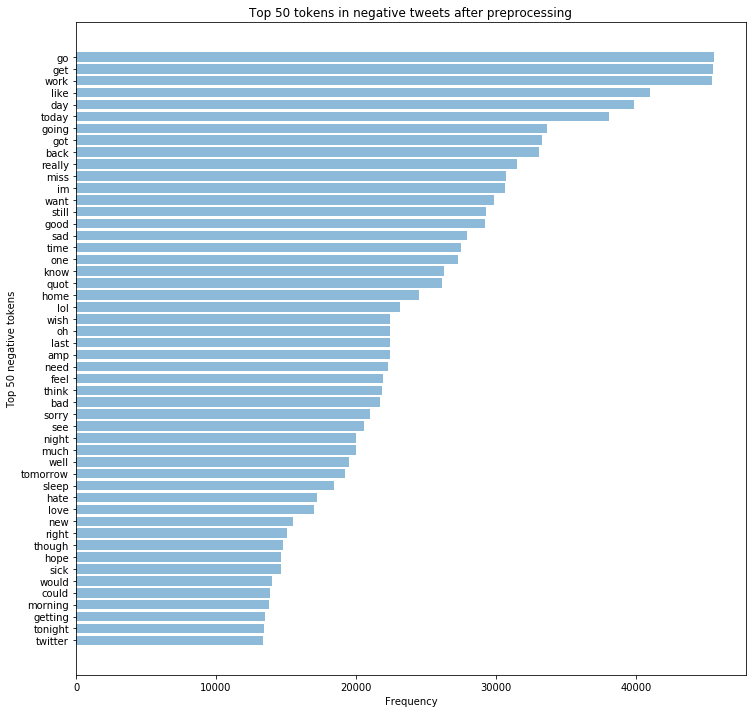

In [19]:
x_range = np.arange(50)
plt.figure(figsize=(12,12))
plt.barh(x_range, term_freq_df_prep.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.yticks(x_range, term_freq_df_prep.sort_values(by='negative', ascending=False)['negative'][:50].index, rotation='horizontal')
plt.xlabel('Frequency')
plt.ylabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets after preprocessing')
plt.gca().invert_yaxis()

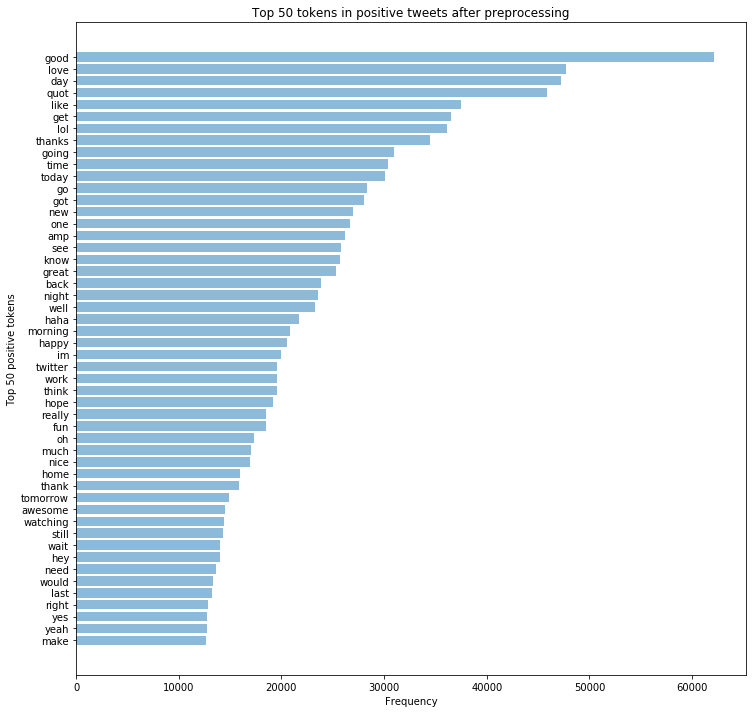

In [20]:
x_range = np.arange(50)
plt.figure(figsize=(12,12))
plt.barh(x_range, term_freq_df_prep.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.yticks(x_range, term_freq_df_prep.sort_values(by='positive', ascending=False)['positive'][:50].index, rotation='horizontal')
plt.xlabel('Frequency')
plt.ylabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets after preprocessing')
plt.gca().invert_yaxis()

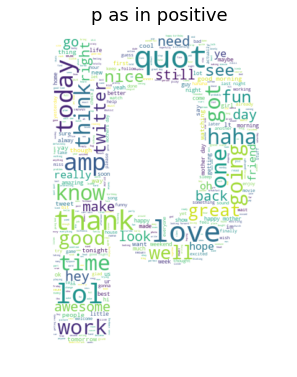

In [20]:
mask = np.array(Image.open('positive.PNG'))
plt.figure(figsize=(12, 6))
wc = WordCloud(mask=mask, background_color='white', max_words=2000, width=mask.shape[1], height=mask.shape[0]).generate(' '.join(df_prep[df_prep['target']=='positive'].iloc[0:200000].text))
plt.axis('off')
plt.title('p as in positive', fontsize=18)
plt.imshow(wc, interpolation='bilinear');

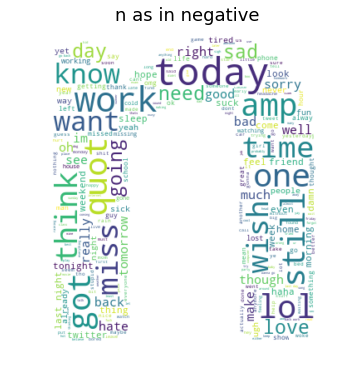

In [21]:
mask = np.array(Image.open('negative.PNG'))
plt.figure(figsize=(12, 6))
wc = WordCloud(mask=mask, background_color='white', max_words=2000, width=mask.shape[1], height=mask.shape[0]).generate(' '.join(df_prep[df_prep['target']=='negative'].iloc[0:200000].text))
plt.axis('off')
plt.title('n as in negative', fontsize=18)
plt.imshow(wc, interpolation='bilinear');

## 2. Modelling and Prediction

In [26]:
test_size = 0.2
max_nb_words = 100000
max_sequence_length = 30

In [29]:
df_model = df_prep[['target', 'text']]
train_data, test_data = train_test_split(df_model, test_size=test_size, random_state=7)
print('Train data size: {}'.format(len(train_data)))
print('Test data size: {}'.format(len(test_data)))

Train data size: 1280000
Test data size: 320000


In [30]:
train_data.head()

,target,text
23786,negative,need friends
182699,negative,im trying call impossible
476661,negative,good pace going 3k 13 min missed 5k turn ended...
1181490,positive,u gonna shows ny soon luv see u live
878773,positive,hell yea get em tattoos ink free wish parents ...
